In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab as pl

In [2]:
#2A

In [3]:
#Get Iris Data
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target
class_names = iris.target_names
features_names = iris.feature_names

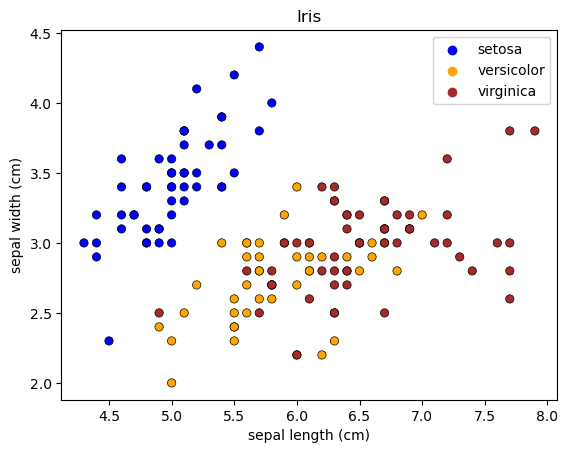

In [4]:
# Plotting an Overview
cmap_bold = ["blue", "orange", "brown"]

fig, ax = plt.subplots()
plt.title('Iris')
plt.xlabel(features_names[0])
plt.ylabel(features_names[1])
sns.scatterplot(
    x = x[:,0],
    y = x[:,1],
    hue = class_names[y],
    palette = cmap_bold, 
    alpha = 1.0,
    edgecolor = "black"
)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_2 = iris.data[:, :2] # we only take the first two features.
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=25)

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train,y_train)
y_pred = logisticRegr.predict(X_test)
accuracy = logisticRegr.score(X_test,y_test)

print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.87


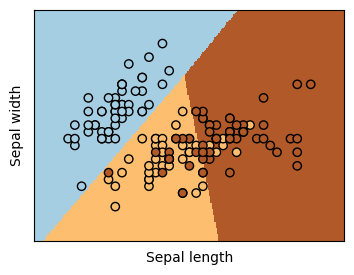

In [6]:
from sklearn import linear_model
h = .02 # step size in the mesh

logreg=linear_model.LogisticRegression(C=1e5)

logreg.fit(X_2, y)
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_2[:,0].min() - .5, X_2[:,0].max() + .5
y_min, y_max = X_2[:,1].min() - .5, X_2[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(x[:,0], x[:,1],c = y, edgecolors='k' )
pl.xlabel('Sepal length')
pl.ylabel('Sepal width')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

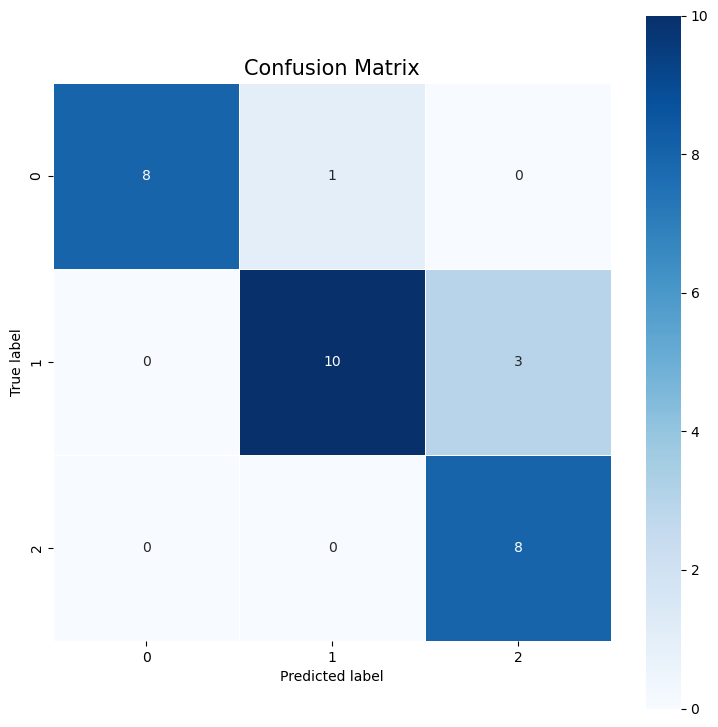

In [7]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()

In [8]:
#2B

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

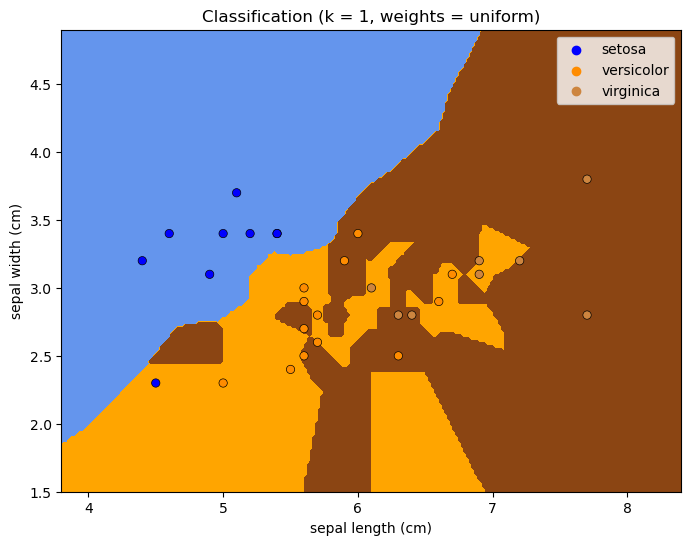

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

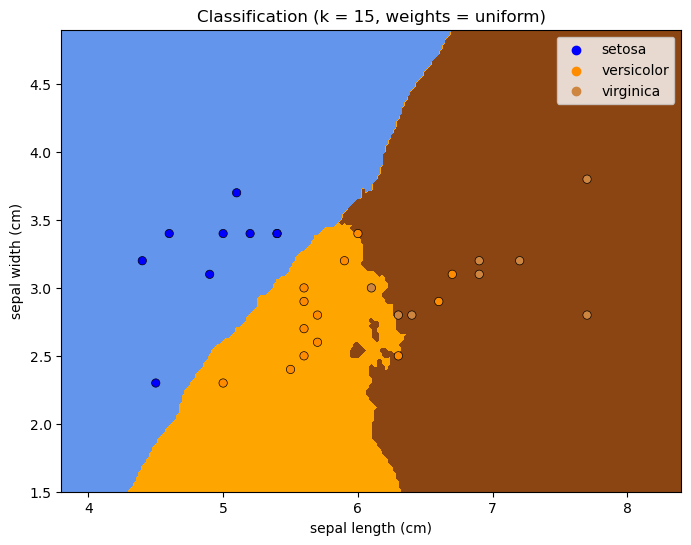

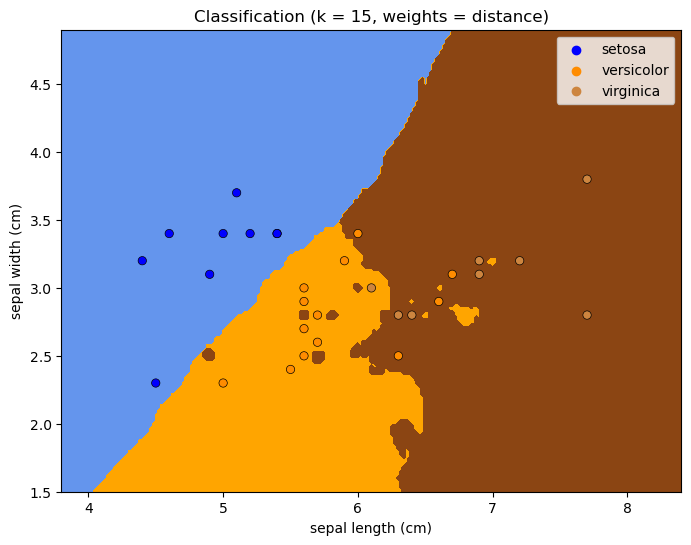

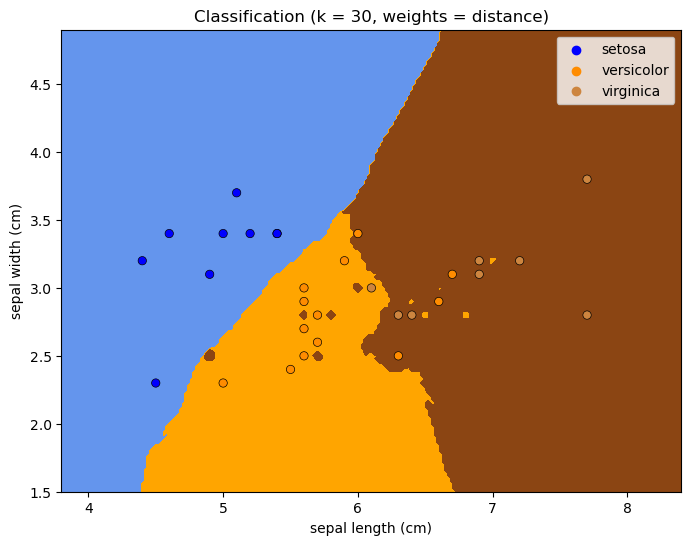

[0 2 1 2 2 1 1 0 1 1 0 0 0 2 0 2 2 1 1 1 1 1 1 0 0 2 1 2 2 0]
[0 2 1 2 2 1 1 0 1 1 0 0 0 2 0 2 2 1 1 1 1 1 1 0 0 2 1 2 2 0]


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib.colors import ListedColormap

h = .02 # step size in the mesh
cmap_light = ListedColormap(["cornflowerblue", "orange", "saddlebrown"])
cmap_bold = ["blue", "darkorange", "peru"]

#Function that produces a plot with decision boundaries with  n = nª of neighbors and 
#w = ['uniform','distance'] (method) and trains a KNN model

def knn_class(n,w):
    knn = KNeighborsClassifier(n_neighbors=n,weights = w)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy_knn = metrics.accuracy_score(y_test,y_pred_knn)    

    x_min, x_max = X_train[:,0].min() - .5, X_train[:,0].max() + .5
    y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    sns.scatterplot(
        x = X_test[:,0],
        y = X_test[:,1],
        hue = class_names[y_test],
        palette = cmap_bold, 
        alpha = 1.0,
        edgecolor = "black"
    )

    plt.title(f'Classification (k = {n}, weights = {w})')    
    plt.xlabel(features_names[0])
    plt.ylabel(features_names[1])

    plt.show()
    
    return y_pred_knn

# KNN uniform
y_uni_1 = knn_class(1,'uniform')
y_uni_15 = knn_class(15,'uniform')

#KNN distance
y_dist_15 = knn_class(15,'distance')
y_dist_30 = knn_class(30,'distance')


In [17]:
#2C

In [35]:
def knn_acc(n,w):
    knn = KNeighborsClassifier(n_neighbors=n,weights = w)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy_knn = metrics.accuracy_score(y_test,y_pred_knn)
    return accuracy_knn  

print('Logistic Regression Accuracy: {:.2f}'.format(accuracy))
print('KNN Uniform, k = 1, accuracy: {:.2f}'.format(knn_acc(1,'uniform')))
print('KNN Uniform, k = 15, accuracy: {:.2f}'.format(knn_acc(15,'uniform')))
print('KNN Distance, k = 15, accuracy: {:.2f}'.format(knn_acc(15,'distance')))
print('KNN Distance, k = 30, accuracy: {:.2f}'.format(knn_acc(30,'distance')))


Logistic Regression Accuracy: 0.87
KNN Uniform, k = 1, accuracy: 0.67
KNN Uniform, k = 15, accuracy: 0.87
KNN Distance, k = 15, accuracy: 0.83
KNN Distance, k = 30, accuracy: 0.83


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

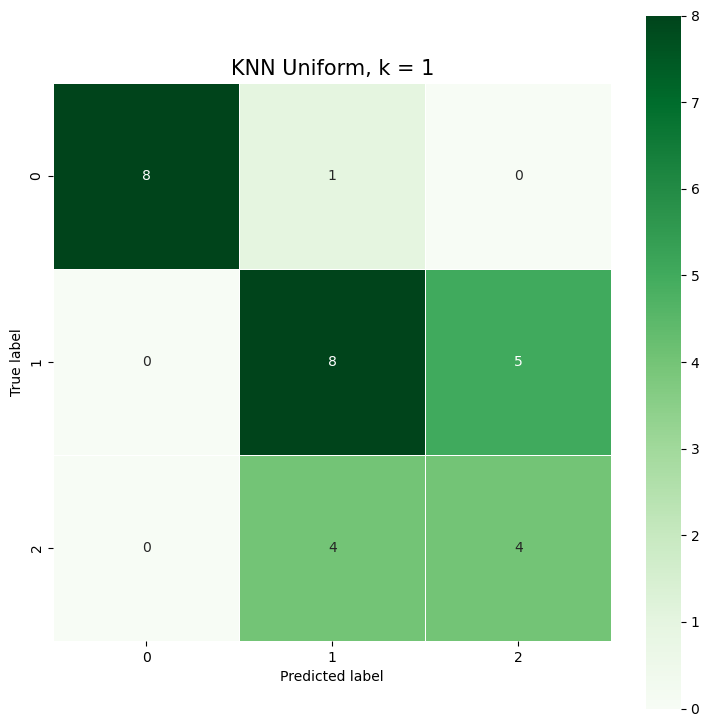

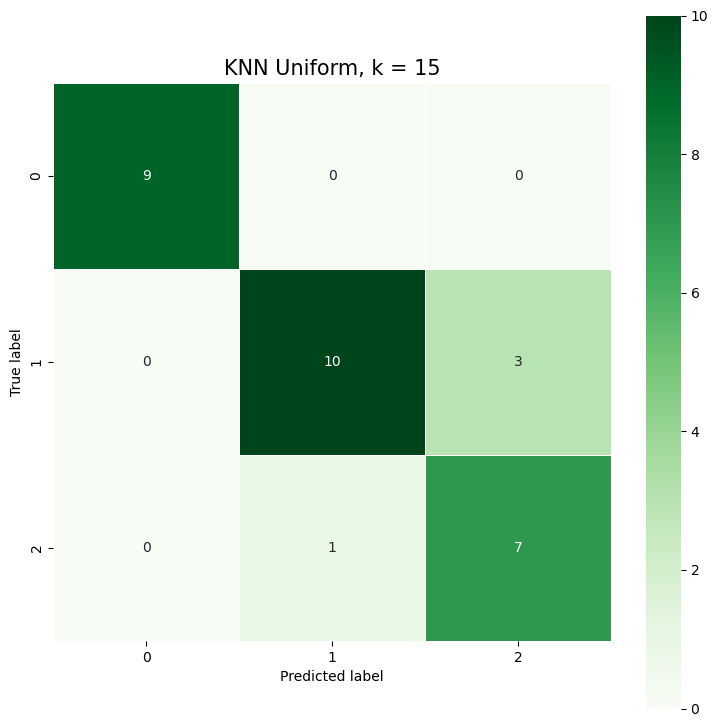

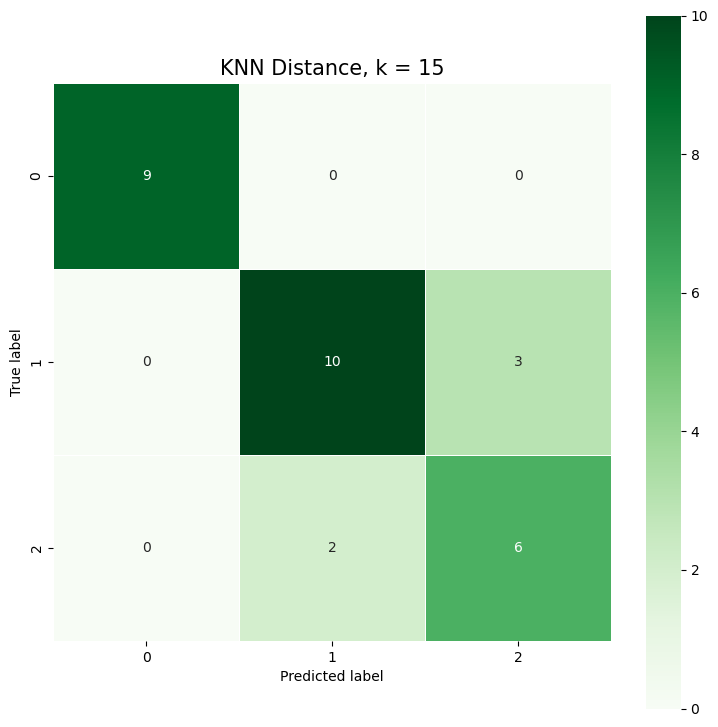

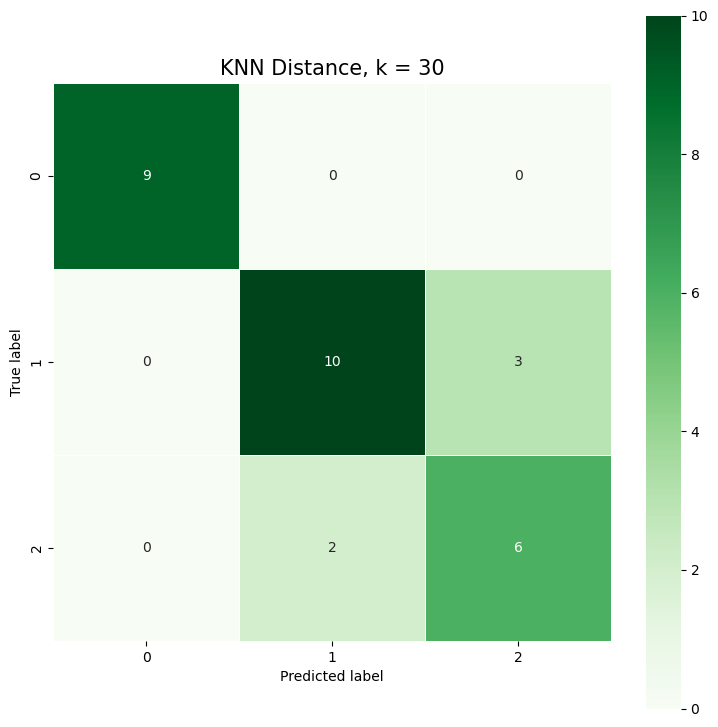

In [36]:
from sklearn.metrics import confusion_matrix

#KNN uniform, k = 1
conf_mat_uniform = confusion_matrix(y_test,y_uni_1)

plt.figure(figsize=(9,9))
sns.heatmap(conf_mat_uniform, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Greens')
plt.ylabel('True label');
plt.xlabel('Predicted label');
all_sample_title = 'KNN Uniform, k = 1'
plt.title(all_sample_title, size = 15);
plt.show();

#KNN uniform, k = 15
conf_mat_uniform = confusion_matrix(y_test,y_uni_15)

plt.figure(figsize=(9,9))
sns.heatmap(conf_mat_uniform, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Greens')
plt.ylabel('True label');
plt.xlabel('Predicted label');
all_sample_title = 'KNN Uniform, k = 15'
plt.title(all_sample_title, size = 15);
plt.show();

#KNN distance, k = 15
conf_mat_uniform = confusion_matrix(y_test,y_dist_15)

plt.figure(figsize=(9,9))
sns.heatmap(conf_mat_uniform, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Greens')
plt.ylabel('True label');
plt.xlabel('Predicted label');
all_sample_title = 'KNN Distance, k = 15'
plt.title(all_sample_title, size = 15);
plt.show();

#KNN distance, k = 30
conf_mat_uniform = confusion_matrix(y_test,y_dist_30)

plt.figure(figsize=(9,9))
sns.heatmap(conf_mat_uniform, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Greens')
plt.ylabel('True label');
plt.xlabel('Predicted label');
all_sample_title = 'KNN Distance, k = 30'
plt.title(all_sample_title, size = 15);
plt.show();
